In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import fbeta_score, confusion_matrix, classification_report

# scaler = StandardScaler()
scaler = MinMaxScaler()

In [2]:
# define a function to plot the result from training step
def show_result(history):

    # Print the result from the last epoch
    print('Last train accuracy: %s'%history.history['accuracy'][-1])
    print('Last validation accuracy: %s'%history.history['val_accuracy'][-1])

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    acc = history.history['accuracy']
    val_acc = history.history['accuracy']

    epochs = range(1, len(loss) + 1)

    # Define a subplot
    fig, axs = plt.subplots(1,2,figsize=(15,4))

    # Plot loss
    loss_plot = axs[0]

    loss_plot.plot(epochs, loss, 'c--', label='Training loss')
    loss_plot.plot(epochs, val_loss, 'b', label='Validation loss')
    loss_plot.set_title('Training and validation loss')
    loss_plot.set_xlabel('Epochs')
    loss_plot.set_ylabel('Loss')
    loss_plot.legend()

    # Plot accuracy
    acc_plot = axs[1]

    acc_plot.plot(epochs, acc, 'c--', label='Training acc')
    acc_plot.plot(epochs, val_acc, 'b', label='Validation acc')
    acc_plot.set_title('Training and validation accuracy')
    acc_plot.set_xlabel('Epochs')
    acc_plot.set_ylabel('Accuracy')
    acc_plot.legend()

# Define an evaluation function to print the evaluation result
def evaluation_report(model,features,labels):

    # Calculate result
    result = model.evaluate(features,labels,verbose=False)

    # Predict and convert into a class
    pred_class = model.predict(features).argmax(axis=1)

    # Show report
    print(confusion_matrix(labels,pred_class))
    print(classification_report(labels,pred_class))
    print("Loss: %s Accuracy: %s" %(result[0],result[1]))

    return pred_class

In [3]:
# main
# def task5():
# Step 0: Data Import
df = pd.read_csv("test.csv")

id_list = df["id"]
boolean_features = ["password_changed", "vpn_usage", "suspicious_login_time", "mass_item_sale"]

# Step 1: Data Preprocessing
df.drop(["id", "player_id"], axis=1, inplace=True)

# - Impute missing values in boolean features
df[boolean_features] = df[boolean_features].fillna(0)

# - Impute missing values in the remaining features with the median value of the feature
median_float_imputer = SimpleImputer(strategy="median")

df = pd.DataFrame(median_float_imputer.fit_transform(df), columns=df.columns)

scaled_df = scaler.fit_transform(df)

print(scaled_df.shape)
# To be continued

(25889, 122)


In [4]:
print(scaled_df)

[[0.20529158 0.28774116 0.17229364 ... 1.         0.         0.        ]
 [0.47976123 0.3486997  0.42945693 ... 0.         0.         0.        ]
 [0.14646867 0.25432231 0.16216132 ... 0.         0.         0.        ]
 ...
 [0.7799308  0.55510188 0.86188989 ... 0.         0.         0.        ]
 [0.63428623 0.49242241 0.4368205  ... 0.         0.         0.        ]
 [0.45106221 0.52602735 0.67665611 ... 0.         0.         0.        ]]


In [23]:
# Step 2: Model Training
input_dim = scaled_df.shape[1]

input_layer = keras.Input(shape=(input_dim,))

encoder = Sequential([
    layers.Dense(64, activation='linear'),
    # layers.Dense(64, activation='relu'),
    # layers.Dense(64, activation='sigmoid'),
    # layers.Dense(32, activation='relu'),
    # layers.Dense(16, activation='linear'),
    layers.Dense(16, activation='relu'),
    # layers.Dense(8, activation='relu'),
    # layers.Dense(4, activation='relu')
])(input_layer)

decoder = Sequential([
    # layers.Dense(8, activation='relu'),
    # layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='linear'),
    # layers.Dense(32, activation='relu'),
    # layers.Dense(32, activation='linear'),
    # layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='linear'),
])(encoder)

output_layer = layers.Dense(input_dim, activation='sigmoid')(decoder)

autoencoder = keras.Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer="adam", loss="mae", metrics=['accuracy'])

X_train, X_test = train_test_split(scaled_df, test_size=0.2, random_state=42)

history = autoencoder.fit(X_train, X_train,
                        epochs=120,
                        batch_size=input_dim,
                        validation_data=(X_test, X_test))
# To be continued

Epoch 1/120
170/170 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0154 - loss: 0.1881 - val_accuracy: 0.0220 - val_loss: 0.1551
Epoch 2/120
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0263 - loss: 0.1511 - val_accuracy: 0.0736 - val_loss: 0.1440
Epoch 3/120
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0926 - loss: 0.1420 - val_accuracy: 0.1267 - val_loss: 0.1387
Epoch 4/120
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1287 - loss: 0.1377 - val_accuracy: 0.1748 - val_loss: 0.1366
Epoch 5/120
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1806 - loss: 0.1361 - val_accuracy: 0.3073 - val_loss: 0.1341
Epoch 6/120
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3364 - loss: 0.1330 - val_accuracy: 0.4224 - val_loss: 0.1309
Epoch 7/120
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4302 - loss: 0.1306 - val_accuracy: 0.4689 - val_loss: 0.1297
Epoch 8/120
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4884 - loss: 0.1292 - val_accu

Last train accuracy: 0.7020906805992126
Last validation accuracy: 0.7035534977912903
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


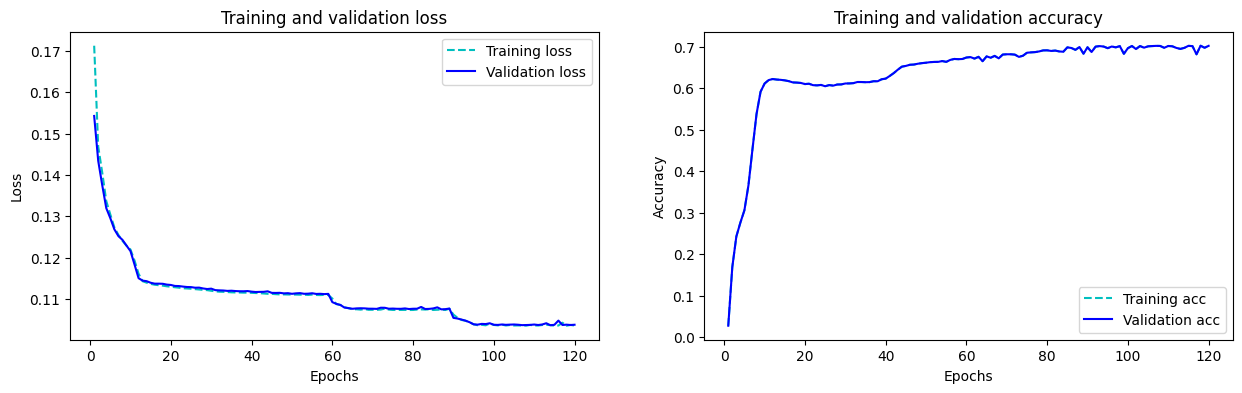

In [20]:
# Step 3: Model Testing & Evaluation
show_result(history)
pred = autoencoder.predict(X_test)

In [7]:
print(X_test.shape)
print(pred.shape)

(5178, 122)
(5178, 122)


In [21]:
# reconstruct_err = np.mean((pred - X_test) ** 2, axis=1)

mae = np.mean(np.abs(X_test - pred), axis=1)

threshold = np.percentile(pred, 95, axis=0)
# threshold = np.percentile(mae, 95, axis=0)

test_bin = (X_test > threshold).astype(int)
pred_bin = (pred > threshold).astype(int)

'''
thresholds = np.linspace(min(mae), max(mae), 50)

best_f3 = -1
best_threshold = None

for t in thresholds:
    test_bin = (X_test > t).astype(int)
    pred_bin = (pred > t).astype(int)
    f3 = fbeta_score(test_bin, pred_bin, beta=3, average="macro")

    if f3 > best_f3:
        best_f3 = f3
        best_threshold = t
'''

f3 = fbeta_score(test_bin, pred_bin, beta=3, average="macro")

print(f3)
# print(best_f3)

0.25975346544459915


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
final_pred = autoencoder.predict(scaled_df)

final_pred_bin = (final_pred > threshold).astype(int)
# final_pred_bin = (final_pred > best_threshold).astype(int)

final_results = np.any(final_pred_bin, axis=1).astype(int)

print(final_results)

810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[1 1 0 ... 1 1 1]


In [10]:
print(final_pred_bin)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
result_df = pd.DataFrame(data={'id': id_list, 'task5': final_results})

print(result_df)

             id  task5
0      ANS00001      1
1      ANS00002      1
2      ANS00003      0
3      ANS00004      1
4      ANS00005      1
...         ...    ...
25884  ANS25885      1
25885  ANS25886      1
25886  ANS25887      1
25887  ANS25888      1
25888  ANS25889      1

[25889 rows x 2 columns]


In [12]:
result_df['task5'].value_counts()

,count
task5,
1,21793
0,4096


In [ ]:
result_df.to_csv("task5_submission.csv", index=False)